In [17]:
import json 
#json é formato diferente(umas listas dentros de outras)
import pandas as pd 
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [18]:
#ter atenção à diferença entre json e cvs
dormidas = pd.read_json("Dormidas nº estadia.json")
dormidas.head()

,IndicadorCod,IndicadorDsg,MetaInfUrl,DataExtracao,DataUltimoAtualizacao,UltimoPref,Dados
0,9183,Dormidas (N.º) nos estabelecimentos de alojame...,https://www.ine.pt/bddXplorer/htdocs/minfo.jsp...,2021-04-25T19:48:24.514+01:00,2020-09-29,2019,"{'2019': [{'geocod': '1191705', 'geodsg': 'Mon..."


In [19]:
#abrir o ficheiro como objeto
#correr/abrir lista
#with open('Dormidas nº estadia.json') as f:
#    d = json.load(f)
dadosDormidas = json_normalize(dormidas['Dados'])
dadosDormidas.head()

<ipython-input-19-bf3b6c42c003>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dadosDormidas = json_normalize(dormidas['Dados'])


,2019
0,"[{'geocod': '1191705', 'geodsg': 'Mondim de Ba..."


In [20]:
dados2019 = json_normalize(dadosDormidas['2019'][0])
dados2019.head()

<ipython-input-20-ca649ecdb17d>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dados2019 = json_normalize(dadosDormidas['2019'][0])


,geocod,geodsg,dim_3,dim_3_t,valor,sinal_conv,sinal_conv_desc
0,1191705,Mondim de Basto,BR,Brasil,333,NaN,NaN
1,11A,Área Metropolitana do Porto,BR,Brasil,562249,NaN,NaN
2,11A0104,Arouca,BR,Brasil,261,NaN,NaN
3,11A0107,Espinho,BR,Brasil,3134,NaN,NaN
4,1500811,Portimão,BR,Brasil,25571,NaN,NaN


In [107]:
tamanho_tabela_1= len(dados2019)
#noção da quantidade de dados
tamanho_tabela_1

17200

In [21]:
rslt_dados2019 = dados2019.loc[(dados2019 ['dim_3_t'] == 'Portugal')]
#loc premite aceder aos que pretencem a portugal
rslt_dados2019.head()

,geocod,geodsg,dim_3,dim_3_t,valor,sinal_conv,sinal_conv_desc
11008,1191705,Mondim de Basto,PT,Portugal,43199,NaN,NaN
11009,11A,Área Metropolitana do Porto,PT,Portugal,1997944,NaN,NaN
11010,11A0104,Arouca,PT,Portugal,27352,NaN,NaN
11011,11A0107,Espinho,PT,Portugal,44340,NaN,NaN
11012,1500811,Portimão,PT,Portugal,710048,NaN,NaN


In [22]:
dados=rslt_dados2019.rename(columns={'geocod':'Codigo','geodsg':'Geografia','dim_3':'Local','dim_3_t': 'Localidade','valor':'Valor'})
#os nomes eram muitos complicados assim mais simples
dados.head()

,Codigo,Geografia,Local,Localidade,Valor,sinal_conv,sinal_conv_desc
11008,1191705,Mondim de Basto,PT,Portugal,43199,NaN,NaN
11009,11A,Área Metropolitana do Porto,PT,Portugal,1997944,NaN,NaN
11010,11A0104,Arouca,PT,Portugal,27352,NaN,NaN
11011,11A0107,Espinho,PT,Portugal,44340,NaN,NaN
11012,1500811,Portimão,PT,Portugal,710048,NaN,NaN


In [23]:
#csv aparece em tabela e "titulos" dá para selecionar/identificar
alojamentos = pd.read_csv("alojamento2019.csv")
alojamentos.head()

,tipo,modalidade,categoria,nome,morada,site,e_mail,telefone,fax,freguesia
0,Empreendimento turístico,Motel,-,Motel Alameda,"EN1, Cavada Nova, 3750-604 Macinhata do Vouga",http://www.alameda-hotel.com/pt-pt,hotelalameda@sapo.pt,234523402.0,234523449.0,Macinhata do Vouga
1,Empreendimento turístico,Residencial,-,Residencial Celeste,"Rua Misericordia de Agueda 713, 3750-130 Agueda",www.residencialceleste.com,residencialceleste@hotmail.com,234602871.0,234602871.0,UF Águeda e Borralha
2,Empreendimento turístico,Residencial,-,Residencial Castro,"Rua da Famel 295, Barrosinhas,ZI EN1 Norte, 37...",www.residencialcastro.pt,geral@residencialcastro.pt,234644356.0,234644993.0,"UF Trofa, Segadães e Lamas"
3,Alojamento local,Moradia,-,Quinta Santa Maria do Monte de Alcobar,"Rua da Escola 120C, 3750-561 Macieira de Alcoba",-,antonio.amaro@ua.pt,NaN,NaN,UF Préstimo e Macieira Alcôba
4,Empreendimento turístico,Hotel,4 estrelas,Hotel Conde de Águeda,"Rua Antonio Ferreira Sucena 7, 3750-121 Águeda",www.hotelcondedagueda.pt,geral@hotelcondedagueda.pt,234610390.0,234610399.0,UF Águeda e Borralha


In [24]:
# loc identifica uma "parte/secção"
rslt_alojamentos = alojamentos.loc[(alojamentos['modalidade'] == 'Motel')]
rslt_alojamentos

,tipo,modalidade,categoria,nome,morada,site,e_mail,telefone,fax,freguesia
0,Empreendimento turístico,Motel,-,Motel Alameda,"EN1, Cavada Nova, 3750-604 Macinhata do Vouga",http://www.alameda-hotel.com/pt-pt,hotelalameda@sapo.pt,234523402.0,234523449.0,Macinhata do Vouga
6,Empreendimento turístico,Motel,-,Motel Primavera,"Rua do Vale do Grou 1243, Vale do Grou, 3750- ...",-,-,234666237.0,234666247.0,Aguada de Cima


In [96]:
#csv mudificado pelo grupo assim premite a sua observação como objeto
with open ("Ano atendimento.csv") as f:
    f.readline() 
    for line in f: 
        print(line)

2010,3832

2011,2601

2012,2299

2013,3173

2014,4560

2015,5592

2016,5504

2017,5170

2018,28122

2019,26580

2020,10015







In [65]:
#dados trasformados devido má construção dos mesmos
atendimentos= pd.read_csv("Ano atendimento.csv")
atendimentos

,ano,atendimentos
0,2010,3832
1,2011,2601
2,2012,2299
3,2013,3173
4,2014,4560
5,2015,5592
6,2016,5504
7,2017,5170
8,2018,28122
9,2019,26580


In [108]:
#media de atendimento durente os 10 anos (mean=media)
media_at=atendimentos["atendimentos"].mean()
media_at

8858.90909090909

In [67]:
#ver as 2 ultimas linhas podemos ver ultimos 2 anos
ultimos_anos=atendimentos[9:]
ultimos_anos

,ano,atendimentos
9,2019,26580
10,2020,10015


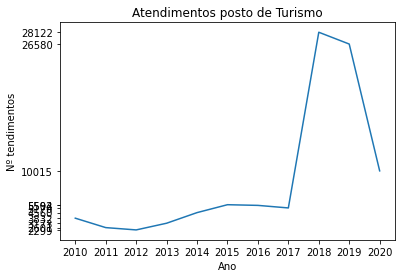

In [26]:
%matplotlib inline
#ano = df ["Ano"].tolist()
#monthList  = df ["Nº atendimentos"].tolist()
plt.plot(atendimentos["ano"], atendimentos["atendimentos"], label = 'Atendimentos por ano')
plt.xlabel('Ano')
plt.ylabel('Nº tendimentos')
plt.xticks(atendimentos["ano"])
plt.title('Atendimentos posto de Turismo')
plt.yticks(atendimentos["atendimentos"])
plt.show()

In [82]:
ocupação= pd.read_json("list_Ocupacao.json")
#json- listas dentro de listas
ocupação

,Classificacao,Categoria,NrEstabelecimento,Tx_Ocup_Cama,Tx_Ocup_Quarto
0,HOTEL,5 Estrelas,24,77.17,82.51
1,HOTEL,4 Estrelas,65,85.17,92.02
2,HOTEL,3 Estrelas,40,85.88,92.22
3,HOTEL-APARTAMENTO,NaN,6,85.21,92.56


In [111]:
soma_quatos=ocupação["Tx_Ocup_Quarto"].sum()
#somas da ocupação de quartos
soma_quatos

359.31

In [112]:
soma_camas=ocupação["Tx_Ocup_Cama"].sum()
#somas da ocupação de camas
soma_camas

333.43

In [105]:
estrelas_3=ocupação.loc [2]
# mostra linha 2 de maneira
estrelas_3.head()

Classificacao             HOTEL
Categoria            3 Estrelas
NrEstabelecimento            40
Tx_Ocup_Cama              85.88
Tx_Ocup_Quarto            92.22
Name: 2, dtype: object

In [110]:
d_ocp=ocupação.describe()
#descritção de toda a tabela
d_ocp

,NrEstabelecimento,Tx_Ocup_Cama,Tx_Ocup_Quarto
count,4.000000,4.000000,4.000000
mean,33.750000,83.357500,89.827500
std,25.038304,4.137837,4.883423
min,6.000000,77.170000,82.510000
25%,19.500000,83.170000,89.642500
50%,32.000000,85.190000,92.120000
75%,46.250000,85.377500,92.305000
max,65.000000,85.880000,92.560000


In [97]:
preços = [["Alojamento","53.16","74.76","57.78"], ["Alimentação","32.52","40.16","33.50"], ["Atracções","7.89","1.18","6.41"], ["Deslocações","5.86","10.83","6.62"], ["Outros","21.73","27.52","23.13"], ["Global","121.17","154.46","127.43"]]
pd.DataFrame(preços, columns=["Tipo","Lazer","Negócios","Total"])
#criação de tabela com dados que não apresentavão qualidade

,Tipo,Lazer,Negócios,Total
0,Alojamento,53.16,74.76,57.78
1,Alimentação,32.52,40.16,33.50
2,Atracções,7.89,1.18,6.41
3,Deslocações,5.86,10.83,6.62
4,Outros,21.73,27.52,23.13
5,Global,121.17,154.46,127.43
